In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data='Bike-Sharing_hour_data.csv'

In [4]:
rides=pd.read_csv(data)

In [5]:
rides

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [6]:
rides.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [7]:
rides.shape

(17379, 17)

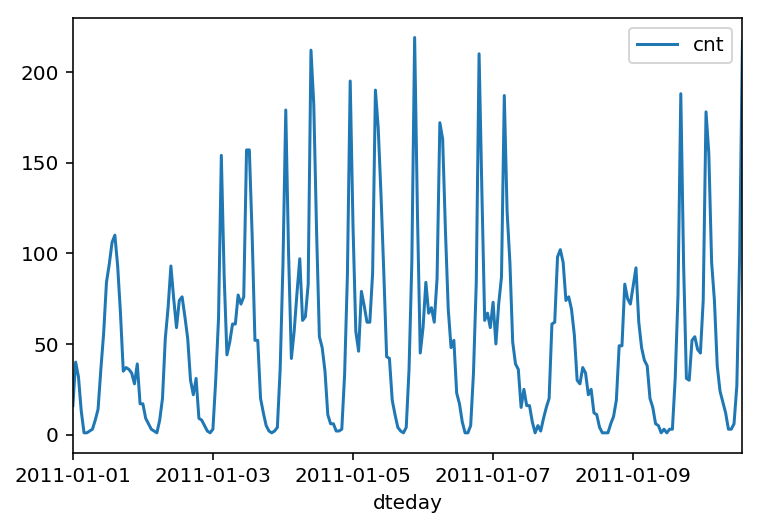

In [8]:
rides[:24*10].plot(x='dteday',y='cnt')
plt.show()

In [9]:
dummy_fields = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
for each in dummy_fields:
    dummies = pd.get_dummies(rides[each], prefix=each, drop_first=False)
    rides = pd.concat([rides, dummies], axis=1)
fields_to_drop=['instant','dteday','season','weathersit','weekday','atemp','mnth','workingday','hr']
data=rides.drop(fields_to_drop,axis=1)

In [10]:
data.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,3,13,16,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0,8,32,40,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0,5,27,32,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0,3,10,13,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [11]:
quant_features = ['casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed']

In [12]:
scaled_features={}
for each in quant_features:
    mean, std=data[each].mean(),data[each].std()
    scaled_features[each]=[mean,std]
    data.loc[:,each]=(data[each]-mean)/std

In [13]:
scaled_features

{'casual': [35.67621842453536, 49.305030387053186],
 'registered': [153.78686920996606, 151.35728591258317],
 'cnt': [189.46308763450142, 181.38759909186527],
 'temp': [0.4969871684216586, 0.19255612124972407],
 'hum': [0.6272288394038822, 0.1929298340629125],
 'windspeed': [0.1900976063064631, 0.12234022857279413]}

In [14]:
data.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,-1.334609,0.947345,-1.553844,-0.662736,-0.930162,-0.956312,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,-1.438475,0.895513,-1.553844,-0.561326,-0.804632,-0.823998,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,-1.438475,0.895513,-1.553844,-0.622172,-0.837666,-0.868103,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,-1.334609,0.636351,-1.553844,-0.662736,-0.949983,-0.972851,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,-1.334609,0.636351,-1.553844,-0.723582,-1.009445,-1.039008,1,0,...,0,0,0,0,0,0,0,0,0,1


In [15]:
test_data=data[-21*24:]
data=data[:-21*24]
target=['cnt','casual','registered']
features,targets=data.drop(target,axis=1),data[target]
test_features,target=test_data.drop(target,axis=1),test_data[target]

In [16]:
features.shape

(16875, 56)

In [17]:
test_data.shape

(504, 59)

In [18]:
train_features,train_targets=features[:-65*24],targets[:-65*24]
val_features,val_targets=features[-60*24:],targets[-60*24:]

In [19]:
val_features.shape

(1440, 56)

In [20]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [21]:
train_features.shape[1]

56

In [22]:
model=Sequential()
model.add(Dense(40,input_dim=train_features.shape[1],kernel_initializer='normal',activation='sigmoid'))
model.add(Dense(1,kernel_initializer='normal'))

In [23]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 40)                2280      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 41        
Total params: 2,321
Trainable params: 2,321
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(x=train_features.values,y=train_targets['cnt'].values,batch_size=10,epochs=20,verbose=1,
          validation_data=[val_features.values, val_targets['cnt'].values])

Train on 15315 samples, validate on 1440 samples
Epoch 1/20
15315/15315 [==============================] - 2s 152us/step - loss: 0.4754 - val_loss: 0.4753
Epoch 2/20
15315/15315 [==============================] - 2s 118us/step - loss: 0.2926 - val_loss: 0.4672
Epoch 3/20
15315/15315 [==============================] - 2s 114us/step - loss: 0.2746 - val_loss: 0.4451
Epoch 4/20
15315/15315 [==============================] - 2s 118us/step - loss: 0.2615 - val_loss: 0.4335
Epoch 5/20
15315/15315 [==============================] - 2s 117us/step - loss: 0.2518 - val_loss: 0.4202
Epoch 6/20
15315/15315 [==============================] - 2s 117us/step - loss: 0.2441 - val_loss: 0.4096
Epoch 7/20
15315/15315 [==============================] - 2s 118us/step - loss: 0.2336 - val_loss: 0.3960
Epoch 8/20
15315/15315 [==============================] - 2s 118us/step - loss: 0.2174 - val_loss: 0.3636
Epoch 9/20
15315/15315 [==============================] - 2s 118us/step - loss: 0.1923 - val_loss: 0.32

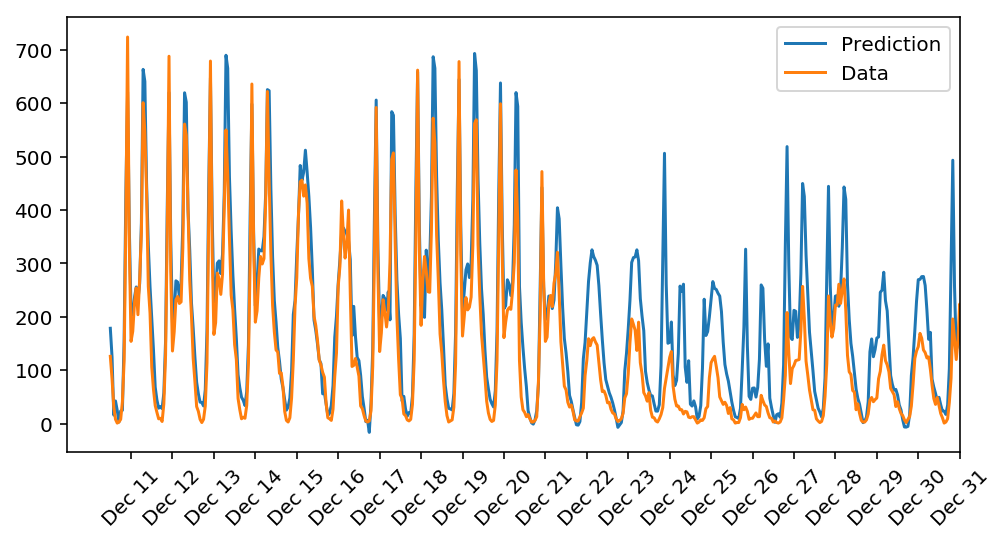

In [26]:
fig, ax = plt.subplots(figsize=(8,4))
mean,std=scaled_features['cnt']
predictions=model.predict(test_features.values).T*std+mean
ax.plot(predictions[0],label='Prediction')
ax.plot((target['cnt']*std+mean).values,label='Data')
ax.set_xlim(right=len(predictions))
ax.legend()

dates = pd.to_datetime(rides.iloc[test_data.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_=ax.set_xticklabels(dates[12::24],rotation=45)